In [30]:
!pip install xgboost


  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import plot_importance




In [3]:
# Load the dataset
file_path = "Loan_Data.csv"
df = pd.read_csv(file_path)


In [4]:
# Display basic information
display(df.head())
display(df.info())
display(df.describe())


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


None

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

In [6]:
# Filling missing values (if necessary, adjust based on dataset)
df.fillna(df.median(), inplace=True)


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


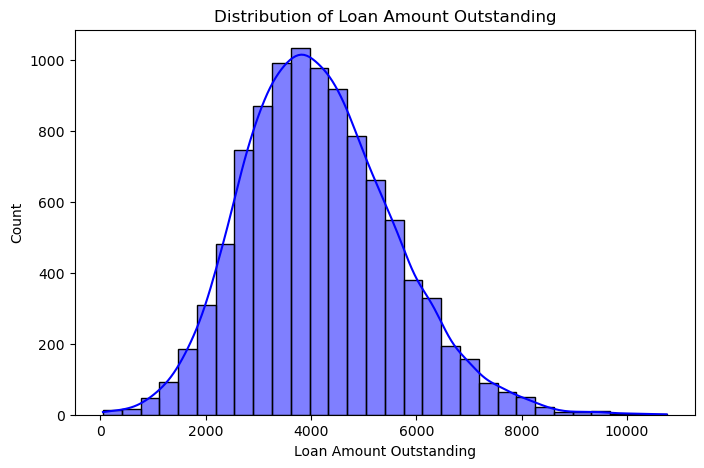

In [8]:
# Check distribution of loan_amt_outstanding
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_amt_outstanding'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount Outstanding')
plt.xlabel('Loan Amount Outstanding')
plt.ylabel('Count')
plt.show()

In [10]:
#Categorizing high outstanding amounts as "Potential Defaults"
threshold = df['loan_amt_outstanding'].median()  # Adjust as needed
df['Default_Risk'] = df['loan_amt_outstanding'].apply(lambda x: 'High' if x > threshold else 'Low')


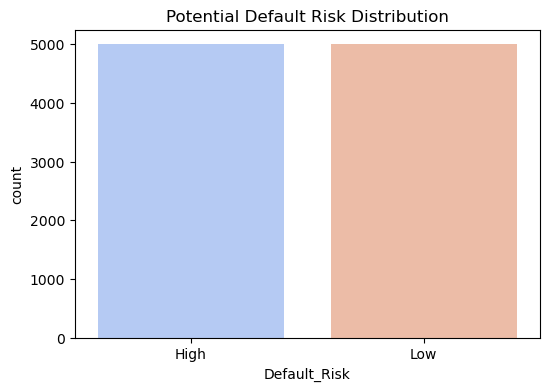

In [11]:
# Visualizing default risk
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Risk', data=df, palette='coolwarm')
plt.title('Potential Default Risk Distribution')
plt.show()

In [12]:
print(df.columns)

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default', 'Default_Risk'],
      dtype='object')


In [16]:
fico_column = "fico_score"  # Change this if needed


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


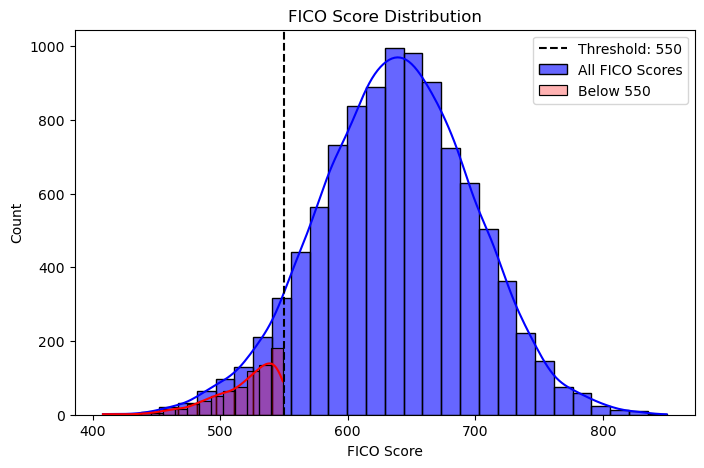

In [17]:
# Verify if the column exists
if fico_column in df.columns:
    plt.figure(figsize=(8, 5))
    
    # Plot all FICO scores in blue
    sns.histplot(df[fico_column], bins=30, kde=True, color='blue', alpha=0.6, label='All FICO Scores')
    
    # Highlight scores below 550 in translucent red
    sns.histplot(df[df[fico_column] < 550][fico_column], bins=15, kde=True, color='red', alpha=0.3, label='Below 550')
    
    plt.axvline(550, color='black', linestyle='--', label='Threshold: 550')
    plt.title('FICO Score Distribution')
    plt.xlabel('FICO Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print("Column 'fico_score' not found. Please check the dataset.")

In [18]:
fico_column = "fico_score"
loan_column = "loan_amt_outstanding"


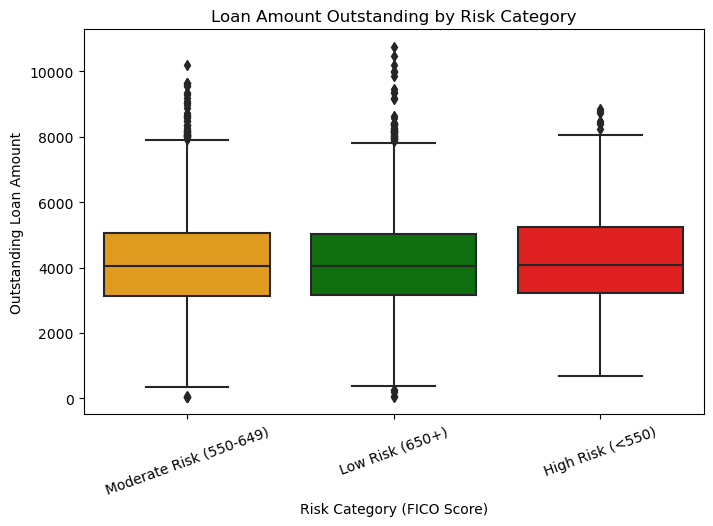

In [20]:
def categorize_fico(score):
    if score < 550:
        return "High Risk (<550)"
    elif score < 650:
        return "Moderate Risk (550-649)"
    else:
        return "Low Risk (650+)"

df["Risk_Category"] = df[fico_column].apply(categorize_fico)

# Box plot to show loan distribution by risk level
plt.figure(figsize=(8, 5))
sns.boxplot(x="Risk_Category", y=loan_column, data=df, palette={"High Risk (<550)": "red", "Moderate Risk (550-649)": "orange", "Low Risk (650+)": "green"})

plt.title("Loan Amount Outstanding by Risk Category")
plt.xlabel("Risk Category (FICO Score)")
plt.ylabel("Outstanding Loan Amount")
plt.xticks(rotation=20)
plt.show()

In [32]:
# Features & Target
X = df[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding',
        'income', 'years_employed', 'fico_score']]
y = df['default']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scaling (for better ML performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [36]:
# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Predictions
log_preds = log_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)


In [38]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

Logistic Regression Accuracy: 0.9955
XGBoost Accuracy: 0.9945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



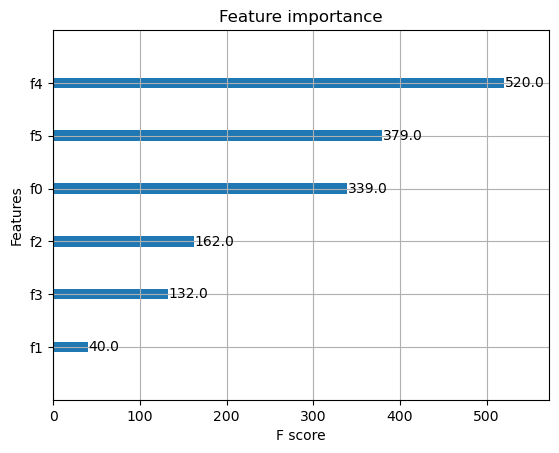

In [40]:
plot_importance(xgb_model)
plt.show()